# <center>Customer Service Requests Analysis</center>

By Kumar Anurag

## Import Libraries

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Understanding the dataset

In [21]:
# Define the data types for columns 48 and 49 (replace 'object' with the appropriate data type)
column_dtype = {'Column_48_Name': 'object', 'Column_49_Name': 'object'}

# Load the dataset into a Pandas DataFrame with specified data types and suppress low_memory warning
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", dtype=column_dtype, low_memory=False)

# Identify the shape of the dataset
shape = data.shape
print("Dataset Shape (Rows, Columns):", shape)

# Identify variables with null values
null_variables = data.columns[data.isnull().any()].tolist()
print("Variables with Null Values:", null_variables)

data.head()

Dataset Shape (Rows, Columns): (364558, 53)
Variables with Null Values: ['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Due Date', 'Resolution Action Updated Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'School Region', 'School Code', 'School Zip', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Missing Value Treatment

In [18]:
# Remove rows with missing values
data.dropna(inplace=True)

## Date Column Analysis

In [10]:
# Filter out rows with incorrect date values (e.g., dates before 2010)
data = data[data['Created Date'] >= '2010-01-01']

## Frequency Plot for City-wise Complaints

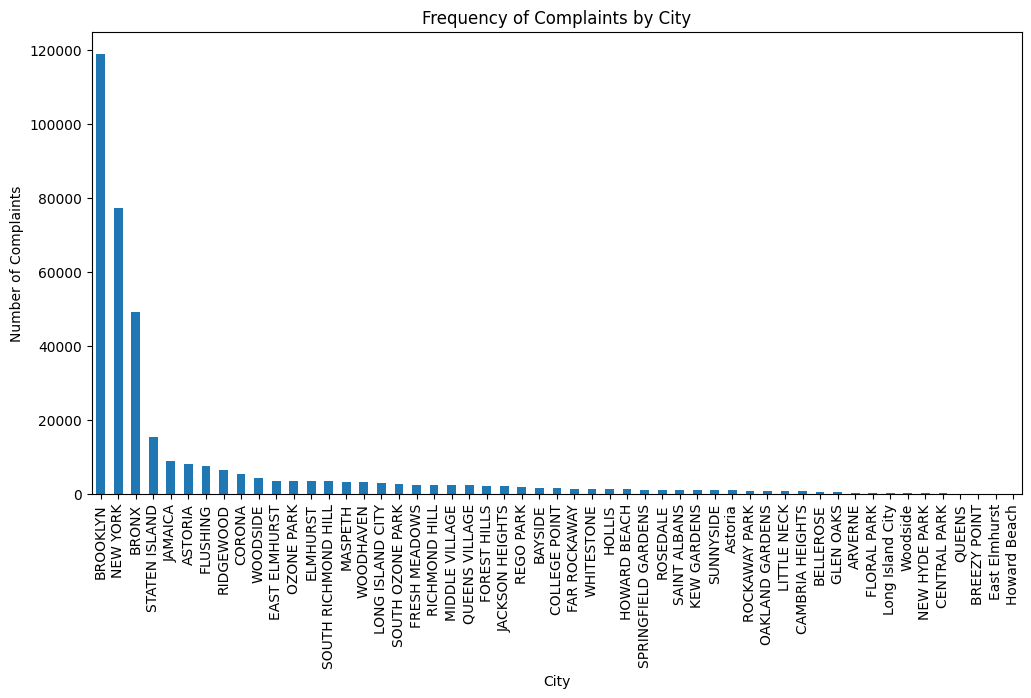

In [26]:
city_complaint_counts = data['City'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
city_complaint_counts.plot(kind='bar')
plt.title('Frequency of Complaints by City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()


## Scatter and Hexbin Plots for Complaint Concentration across Brooklyn

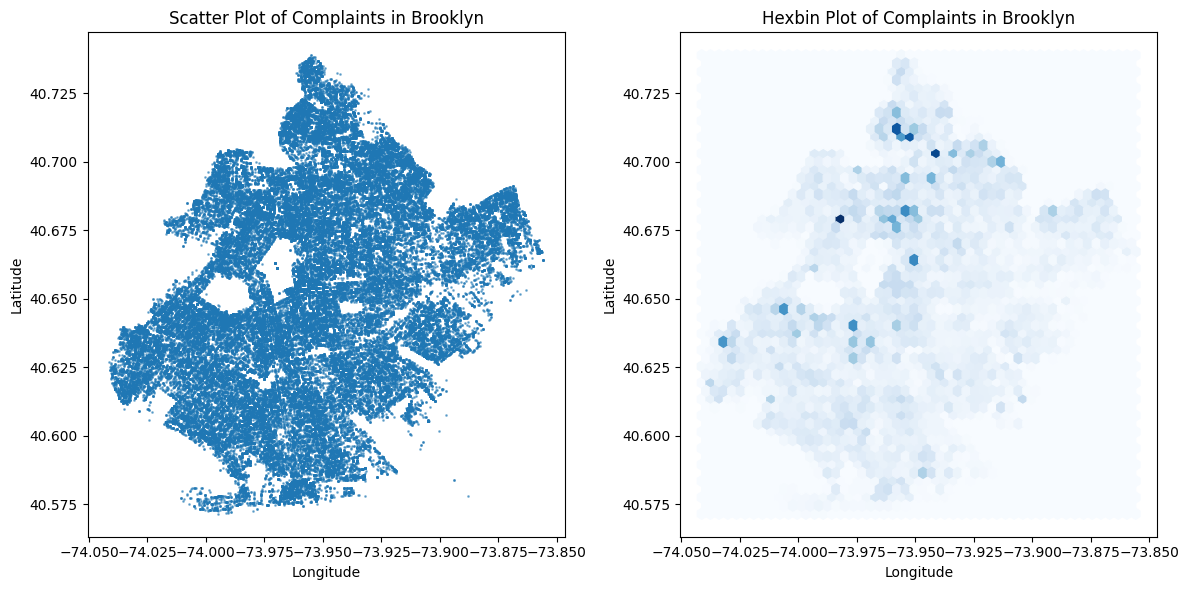

In [25]:
# Filter data for Brooklyn
brooklyn_data = data[data['Borough'] == 'BROOKLYN']

if not brooklyn_data.empty and 'Latitude' in brooklyn_data and 'Longitude' in brooklyn_data:
    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(brooklyn_data['Longitude'], brooklyn_data['Latitude'], s=1, alpha=0.5)
    plt.title('Scatter Plot of Complaints in Brooklyn')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Hexbin plot
    plt.subplot(1, 2, 2)
    plt.hexbin(brooklyn_data['Longitude'], brooklyn_data['Latitude'], gridsize=50, cmap='Blues')
    plt.title('Hexbin Plot of Complaints in Brooklyn')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.tight_layout()
    plt.show()
else:
    print("No geographical data available for Brooklyn.")


## Plot a Bar Graph of Count vs. Complaint Types

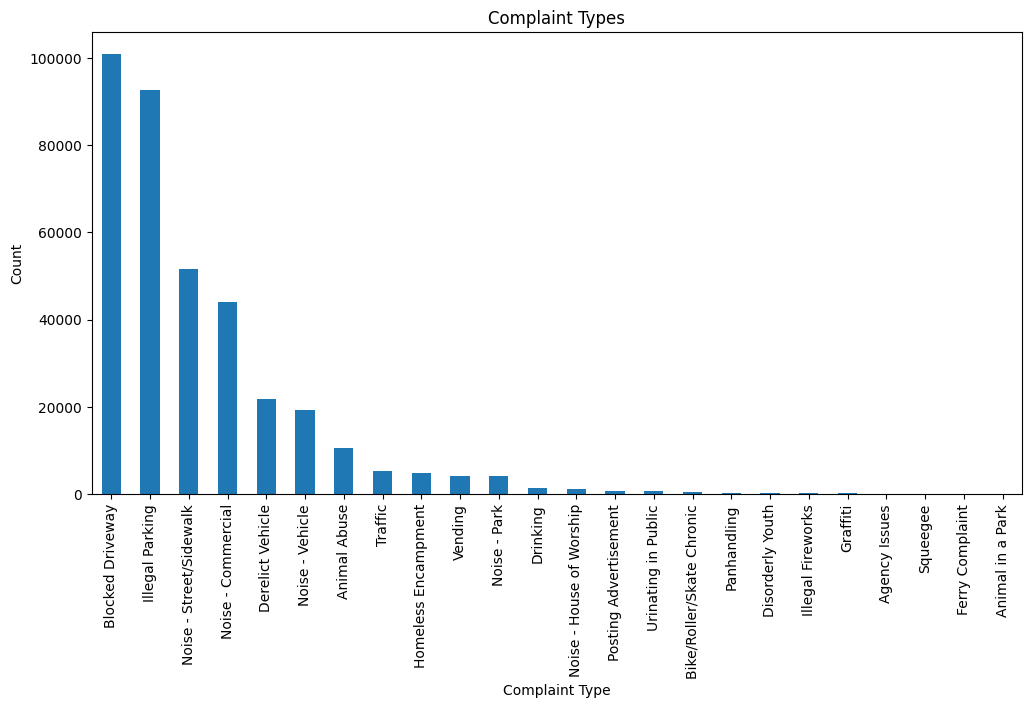

In [24]:
complaint_type_counts = data['Complaint Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(12, 6))
complaint_type_counts.plot(kind='bar')
plt.title('Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Top 10 Types of Complaints

In [23]:
# Assuming the complaint type column is named 'Complaint Type'
top_10_complaints = complaint_type_counts.head(10)
print("Top 10 Complaint Types:")
print(top_10_complaints)

Top 10 Complaint Types:
Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: count, dtype: int64


## Types of complaints in each city in a separate dataset

In [28]:
city_complaint_datasets = {}

# Iterate through unique cities
unique_cities = data['City'].unique()
for city in unique_cities:
    city_complaint_datasets[city] = data[data['City'] == city]
    
# Display the types of complaints in each city in a separate dataset
for city, city_data in city_complaint_datasets.items():
    print(f"City: {city}")
    print(city_data['Complaint Type'].value_counts())
    print("\n")


City: NEW YORK
Complaint Type
Noise - Street/Sidewalk      22252
Noise - Commercial           18692
Illegal Parking              14553
Noise - Vehicle               6295
Homeless Encampment           3060
Blocked Driveway              2707
Vending                       2639
Animal Abuse                  1941
Traffic                       1770
Noise - Park                  1244
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: count, dtype: int64


City: ASTORIA
Complaint Type
Blocked Driveway             3436
Noise - Commercial           1653
Illegal Parking              1340
Derelict Vehicle              426
Noise - Street/Sidewalk       409
Noise - 

## Visualization the major types of complaints in each city

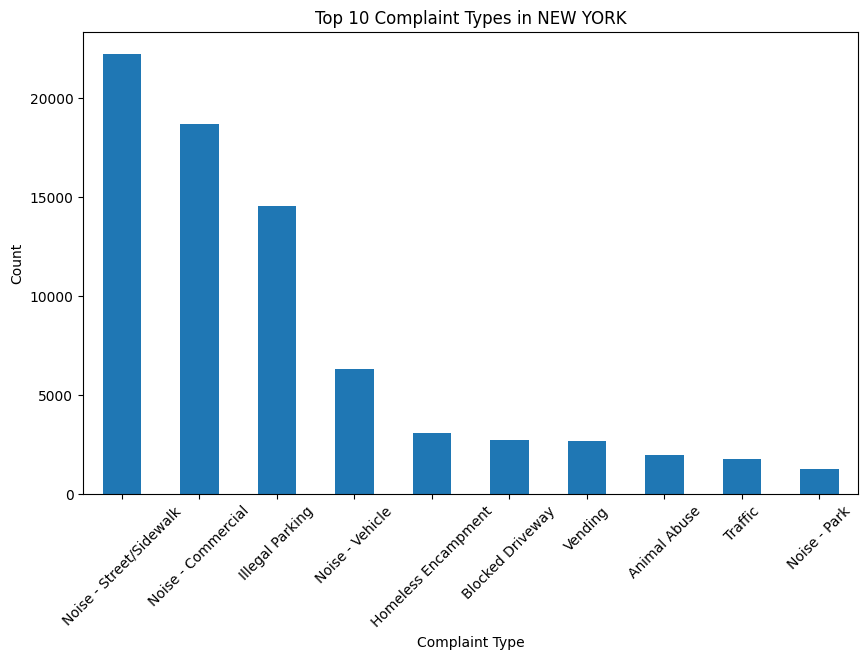

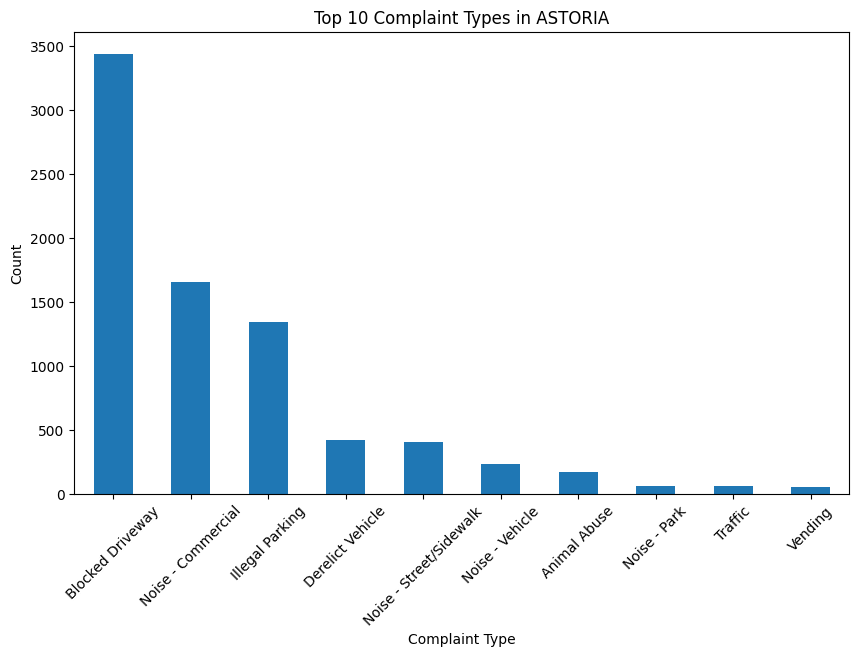

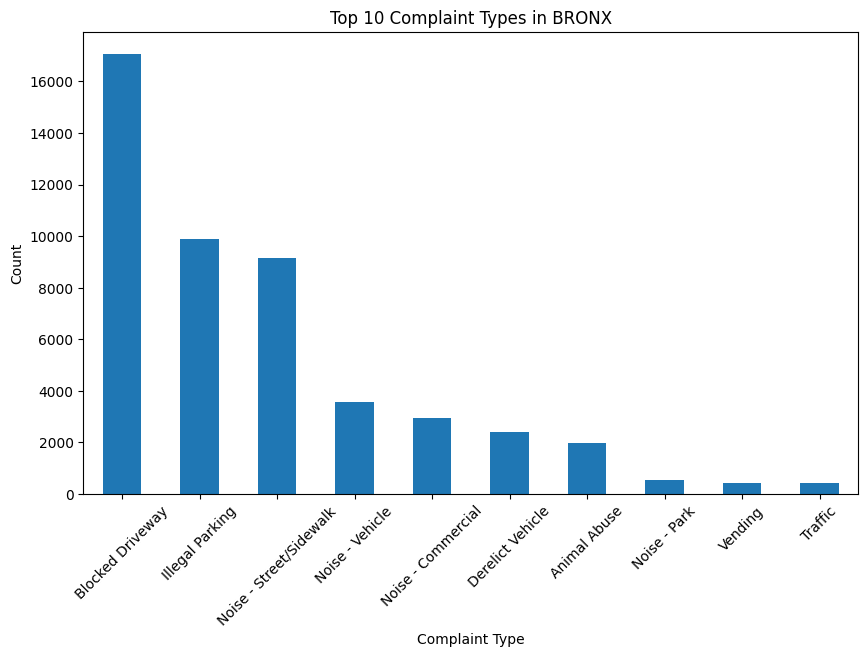

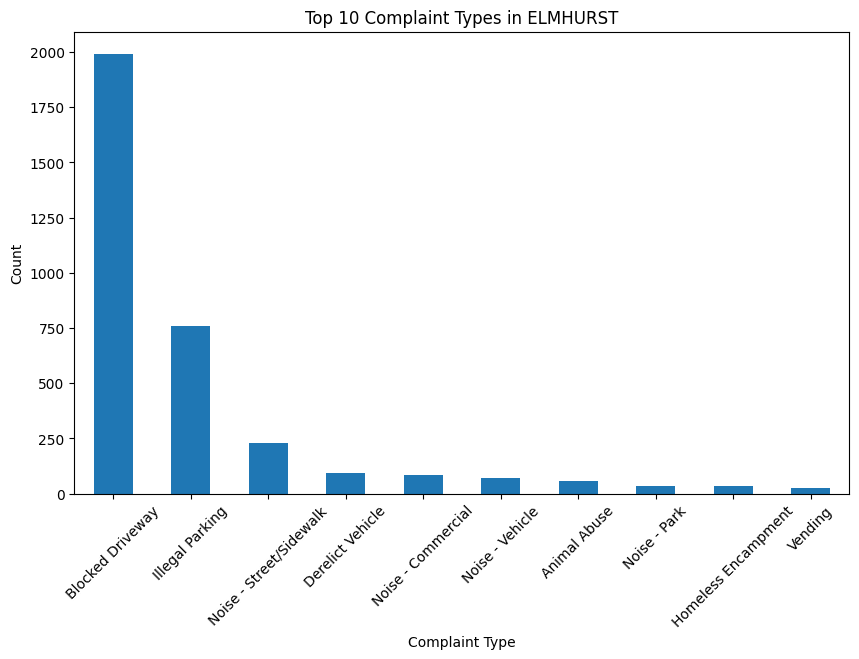

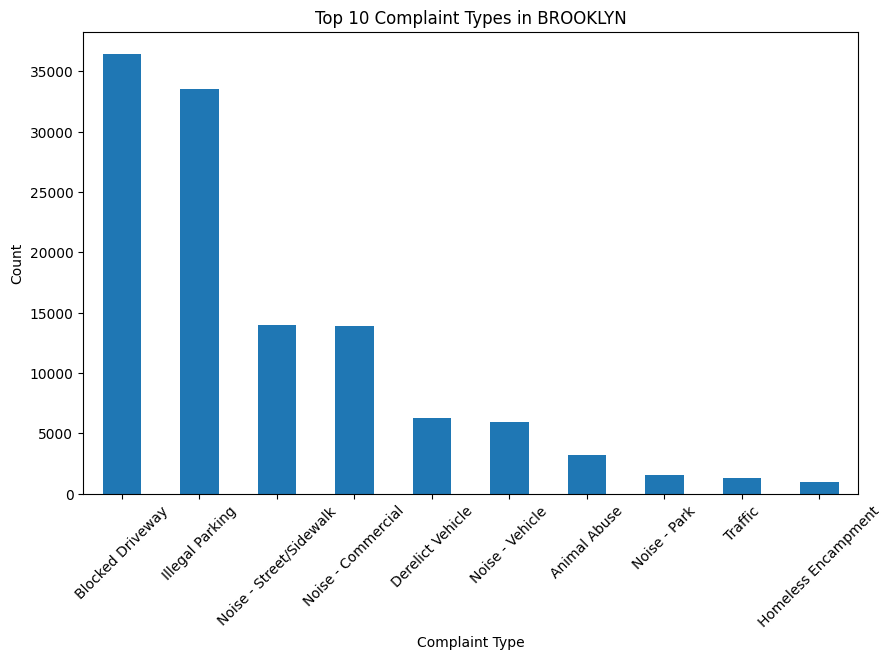

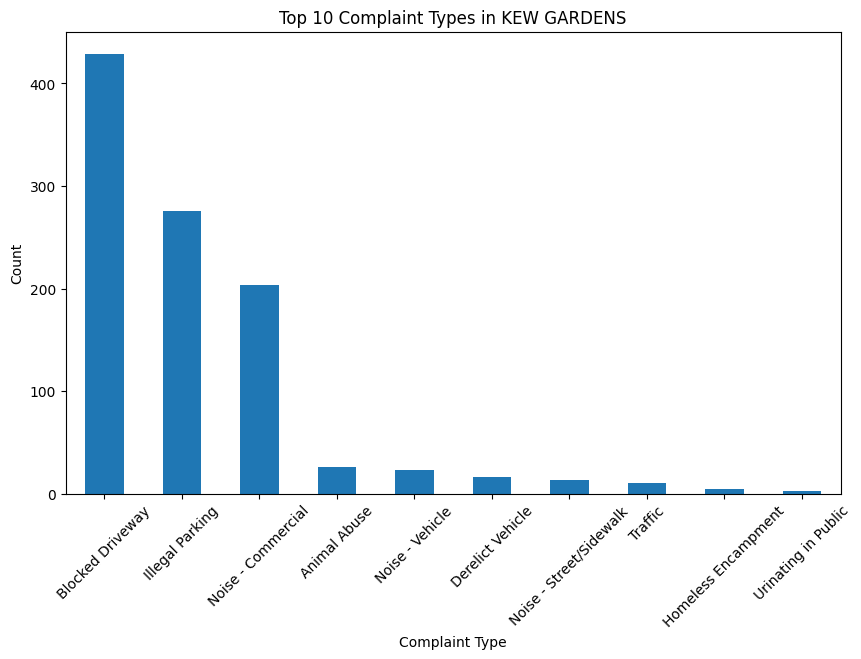

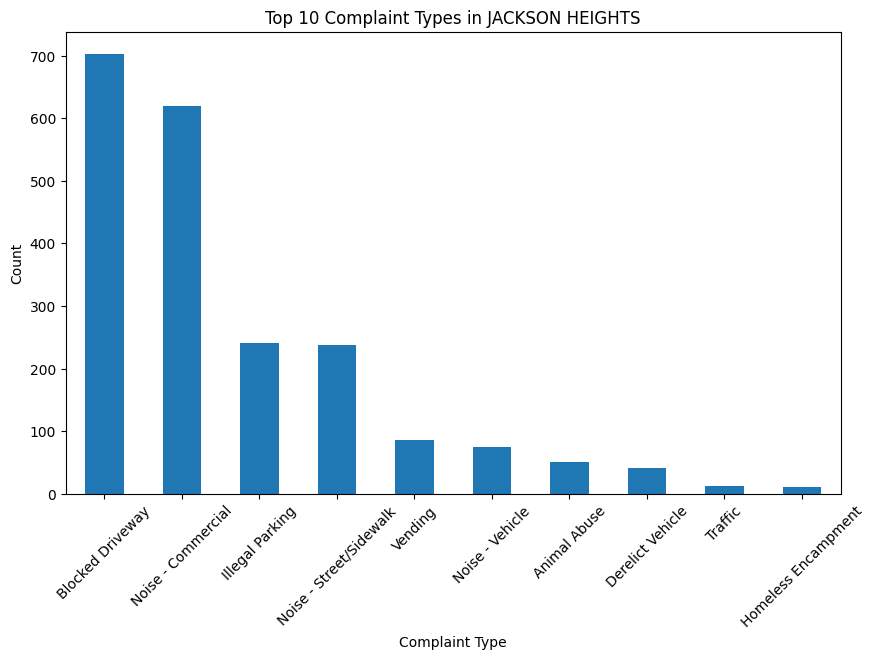

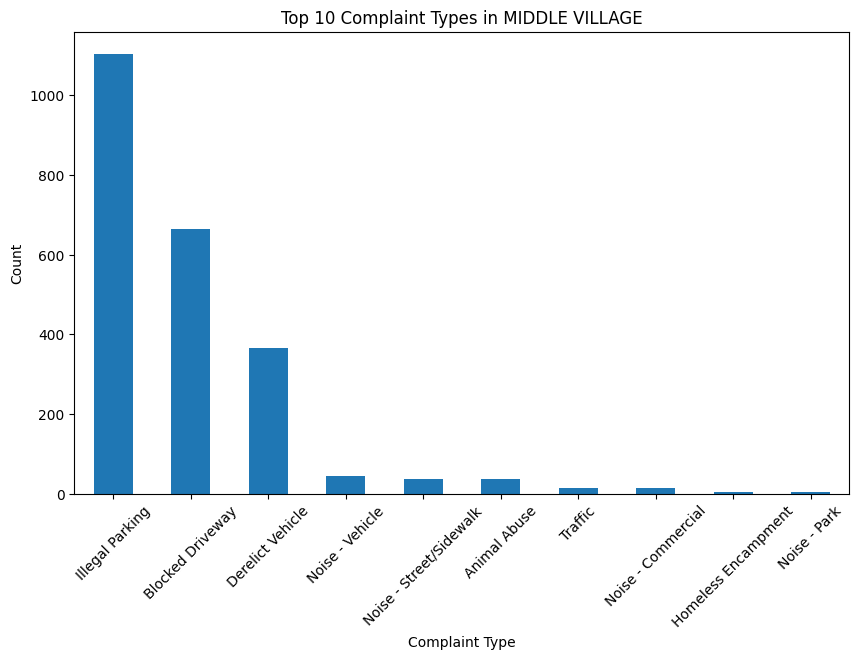

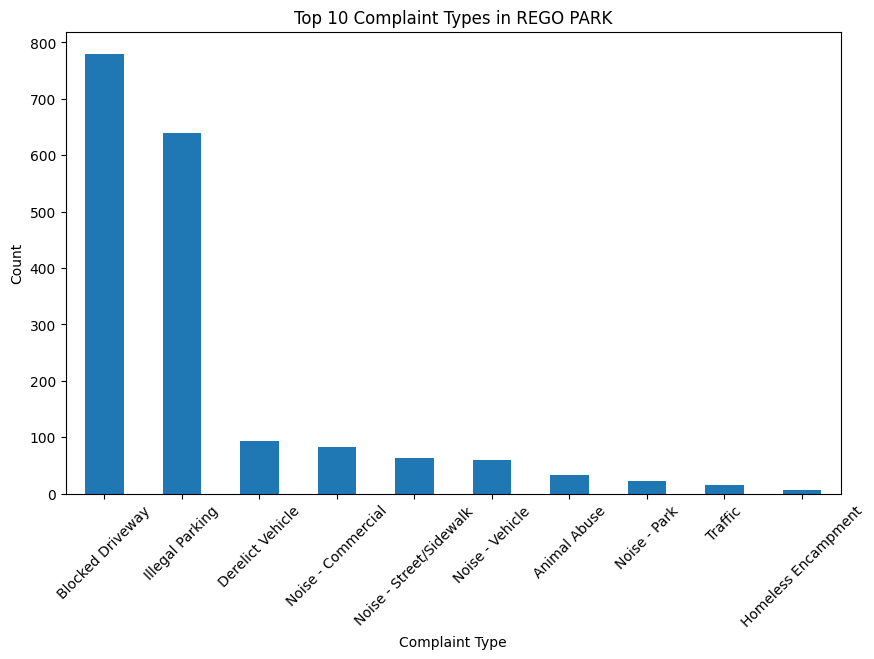

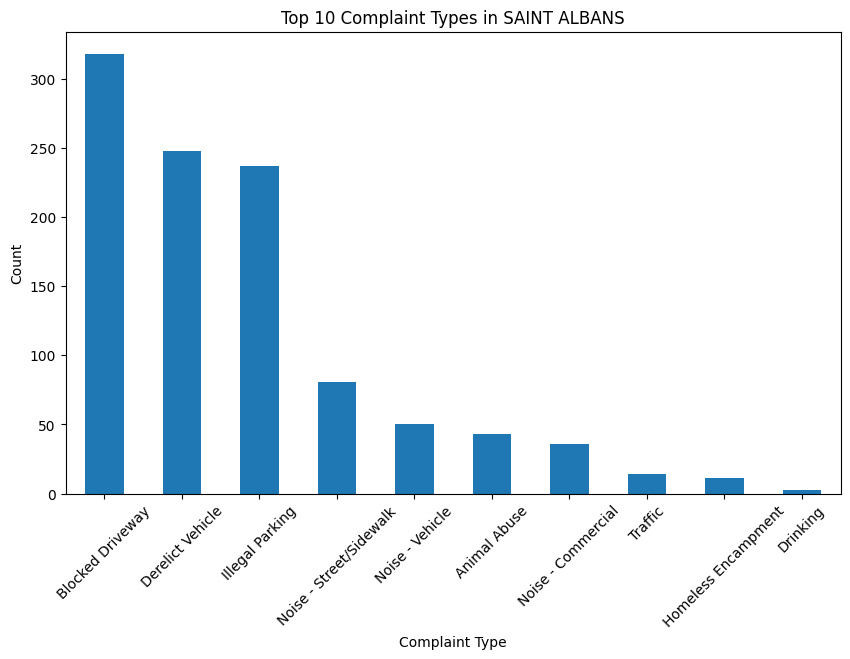

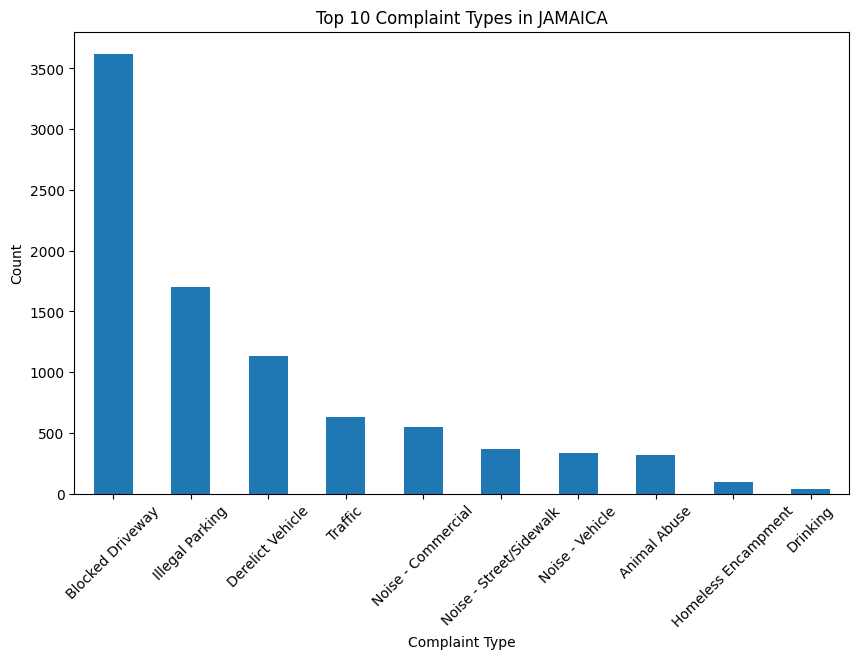

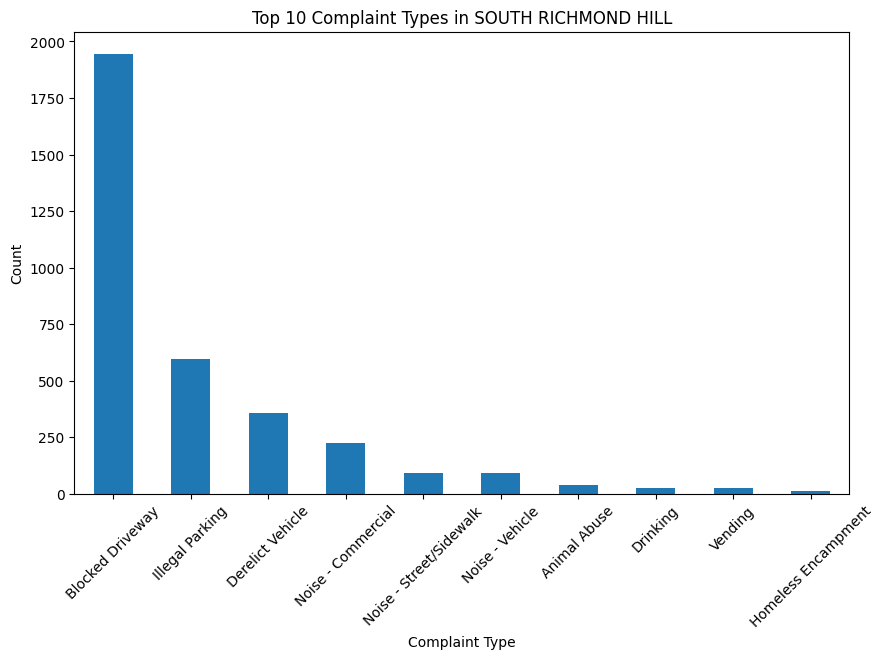

No complaints found for nan.


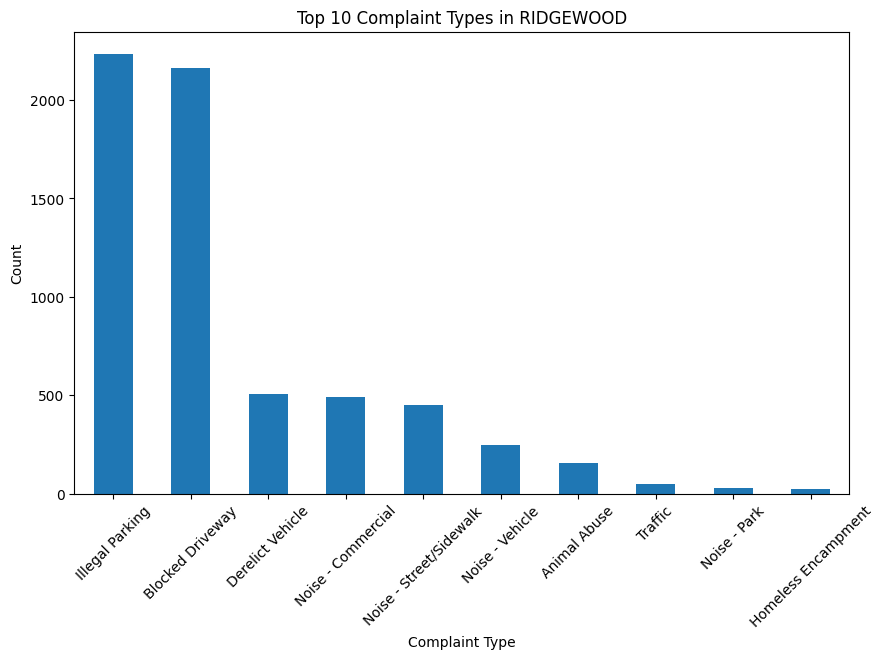

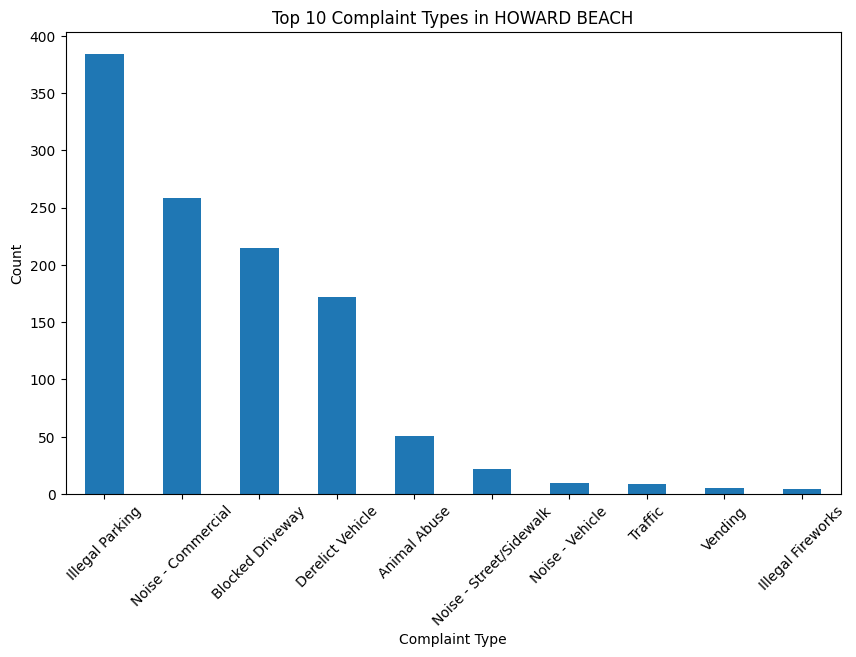

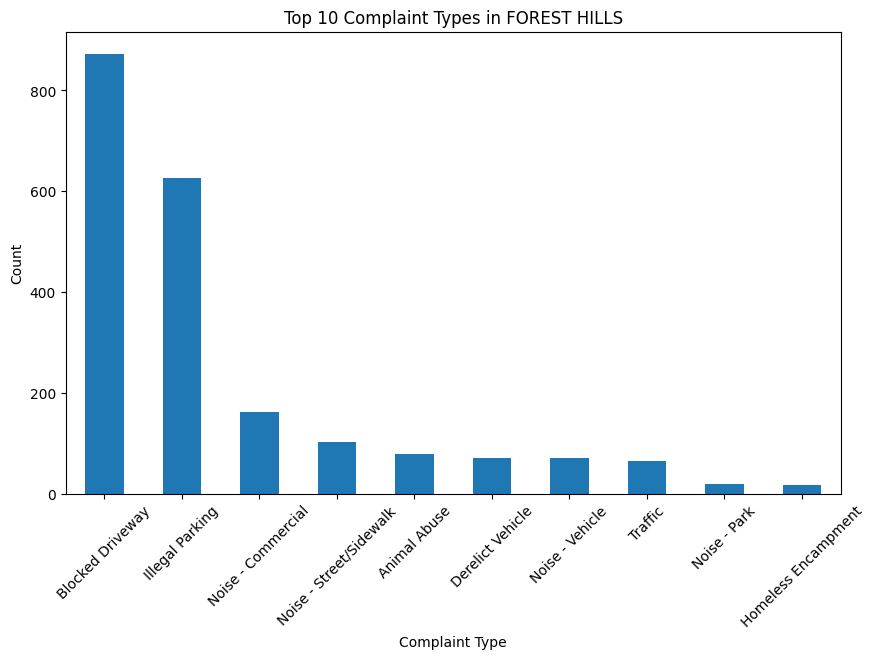

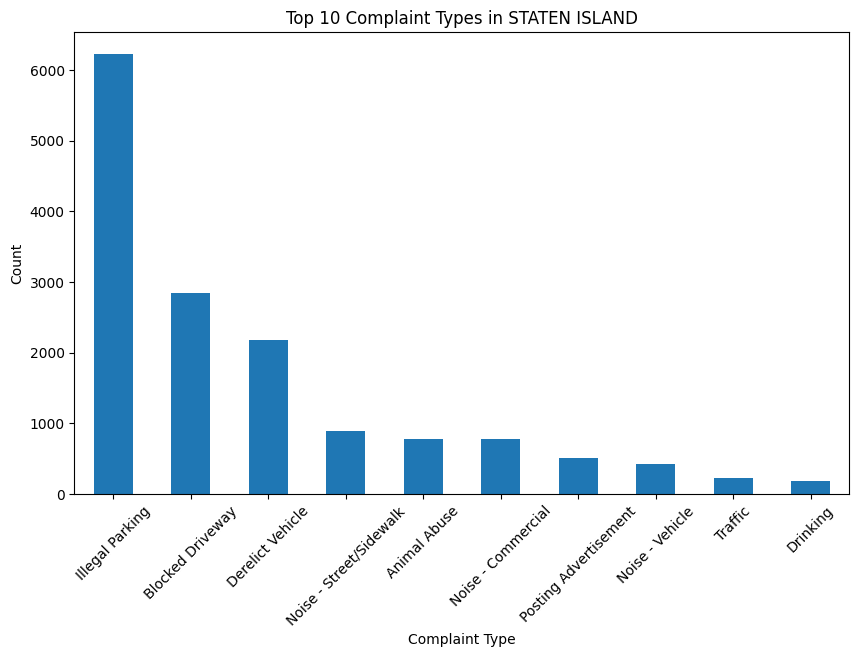

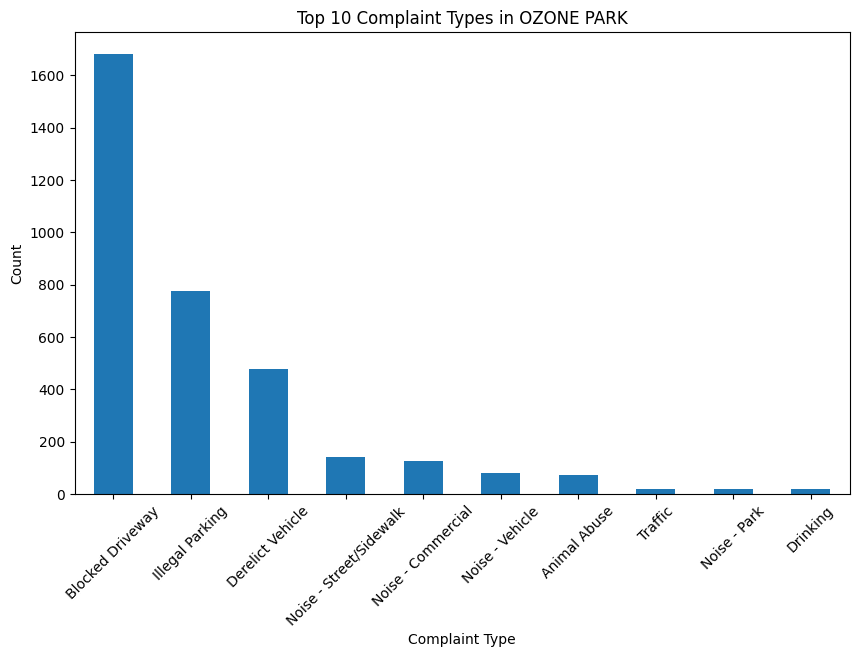

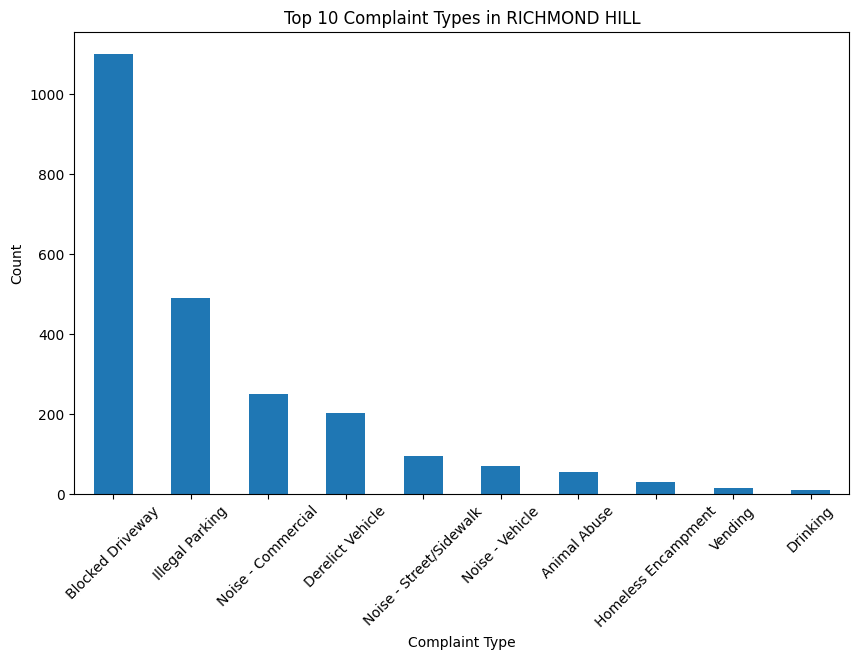

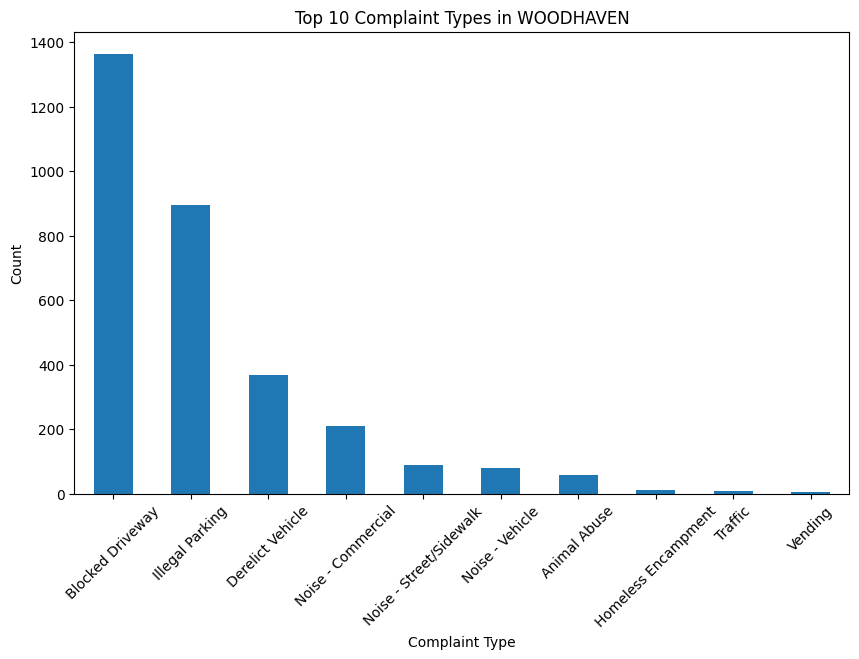

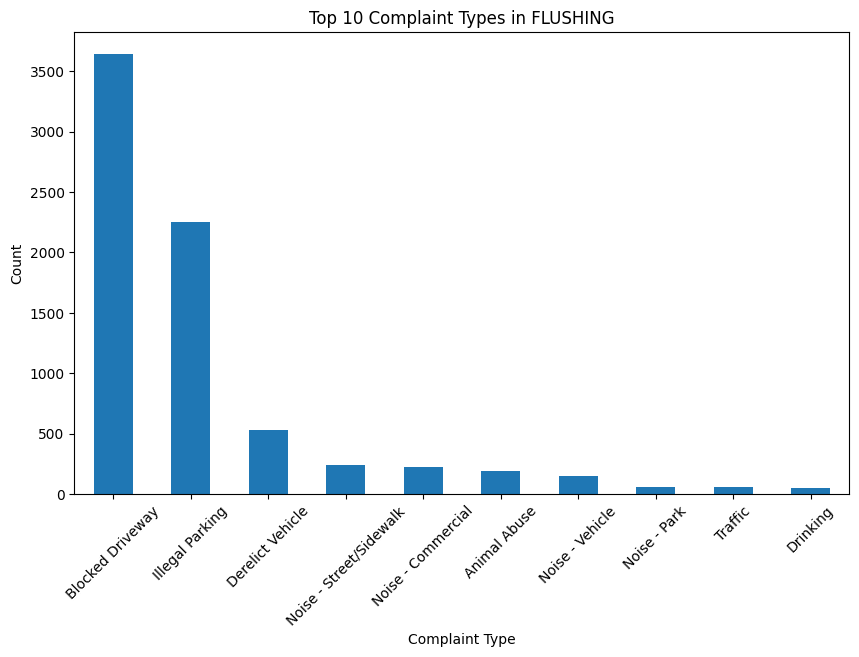

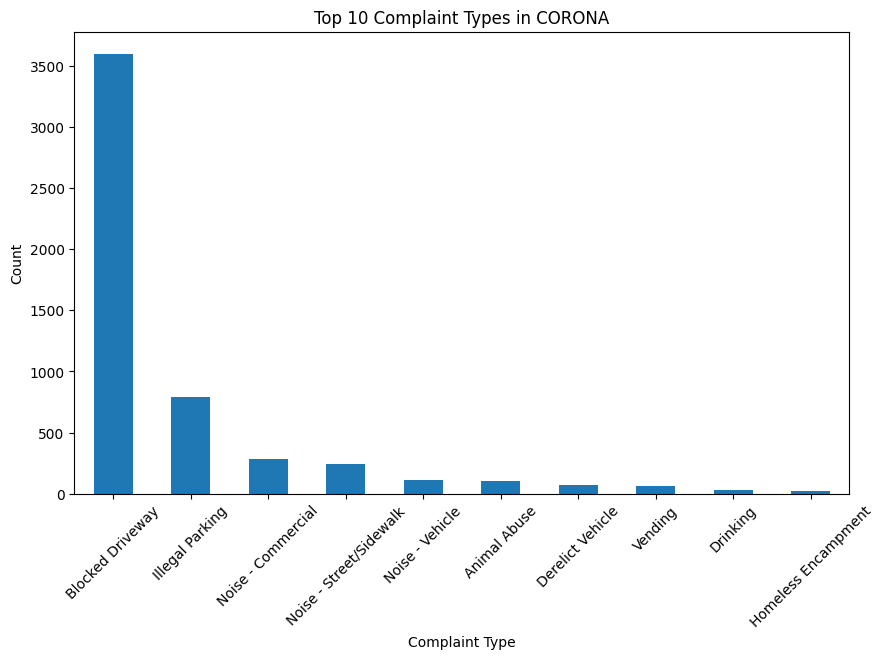

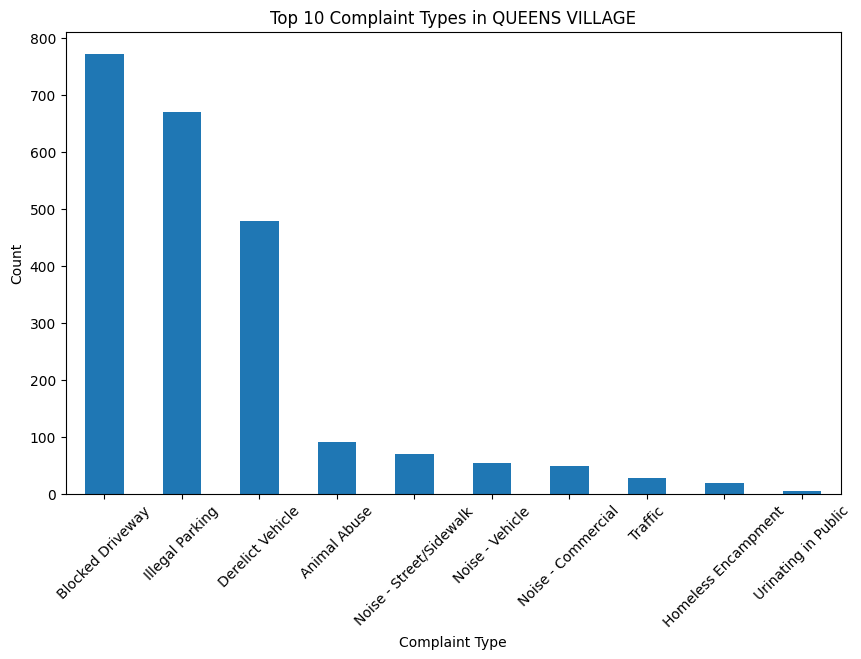

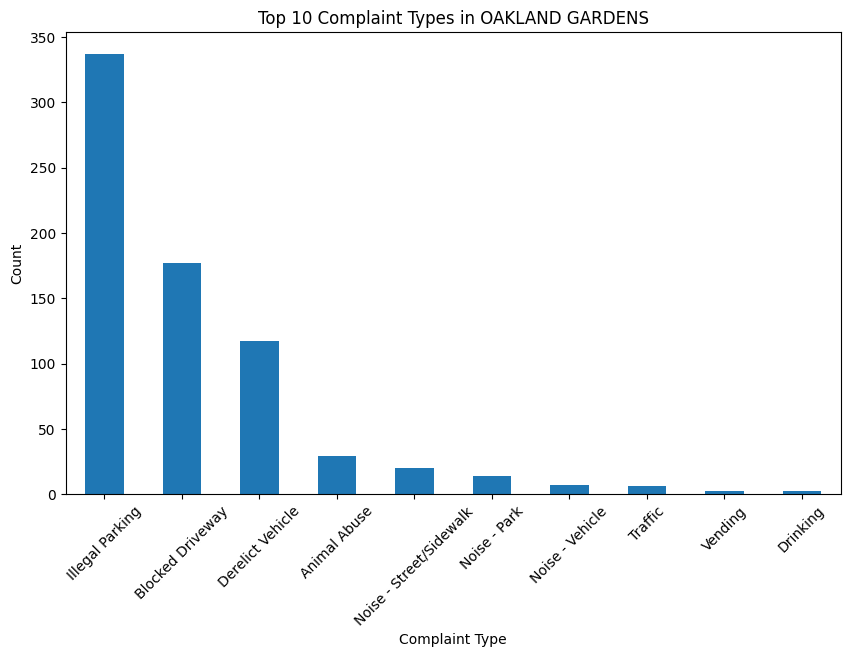

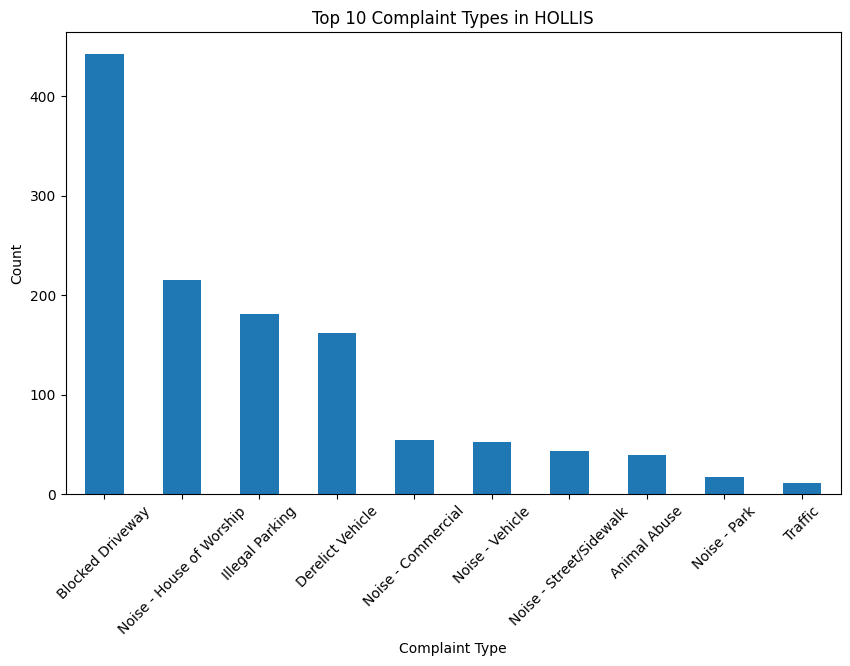

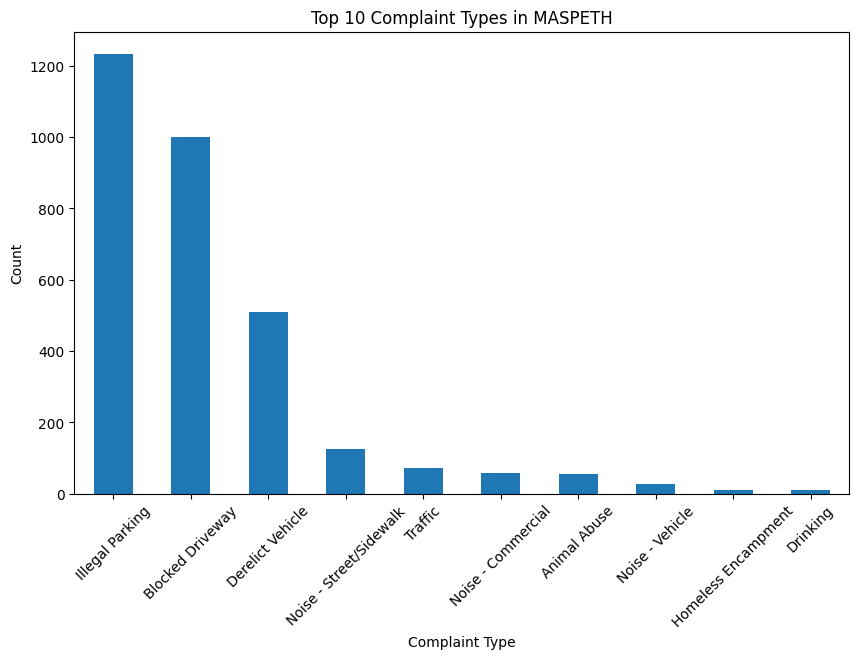

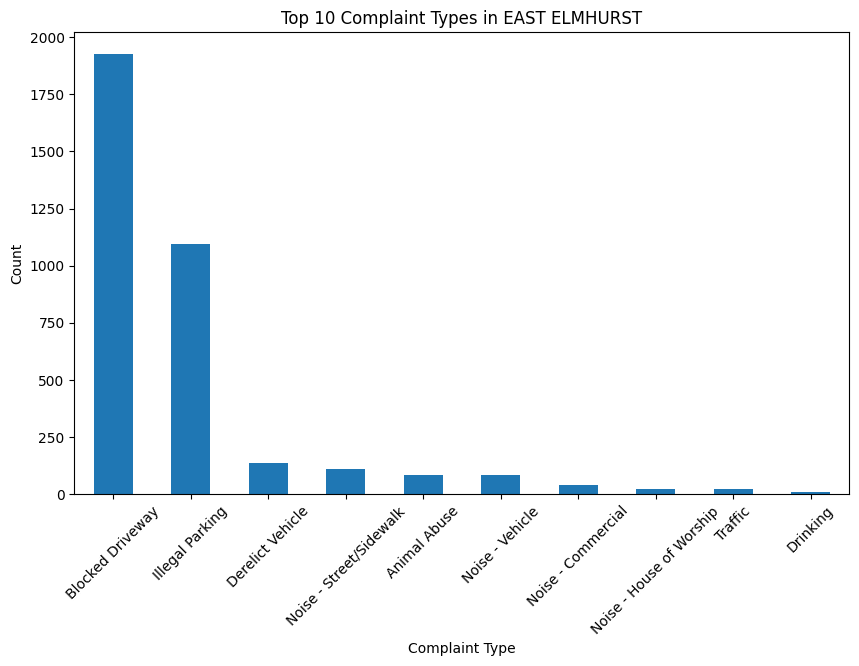

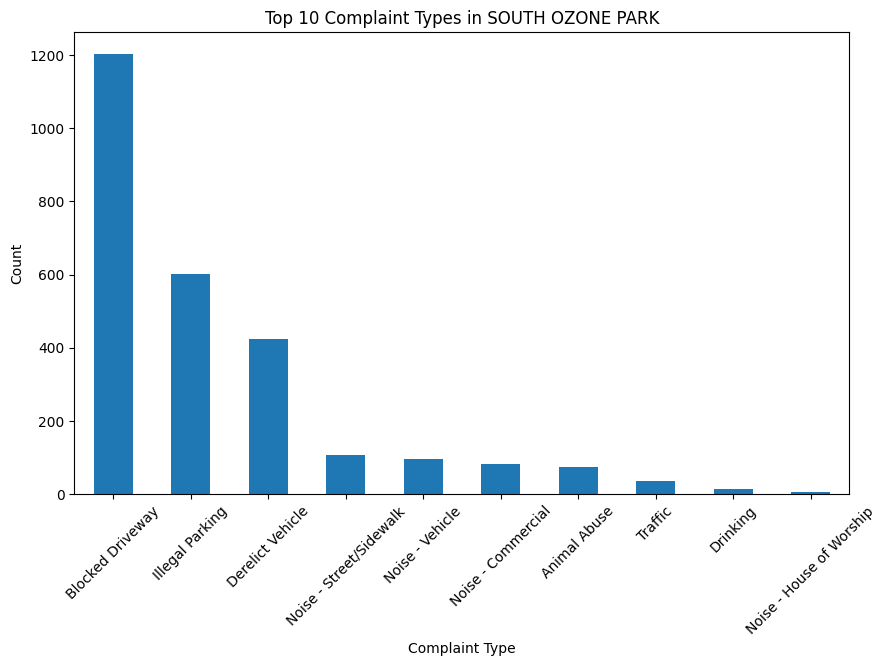

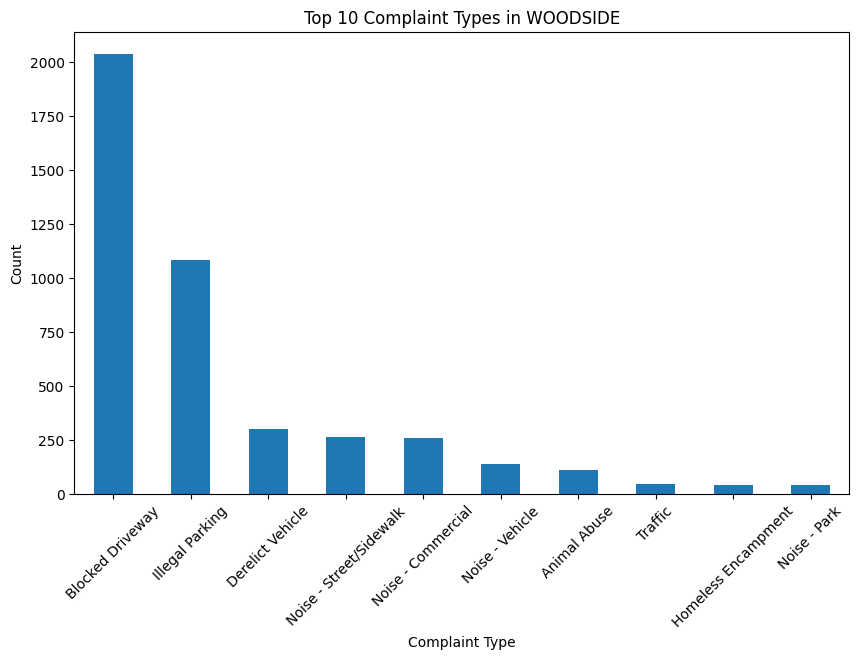

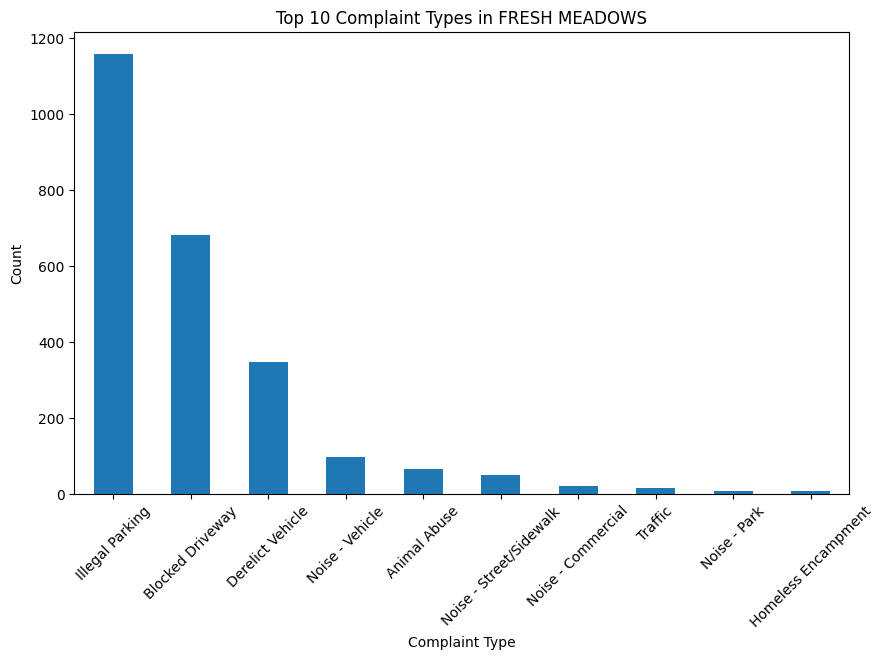

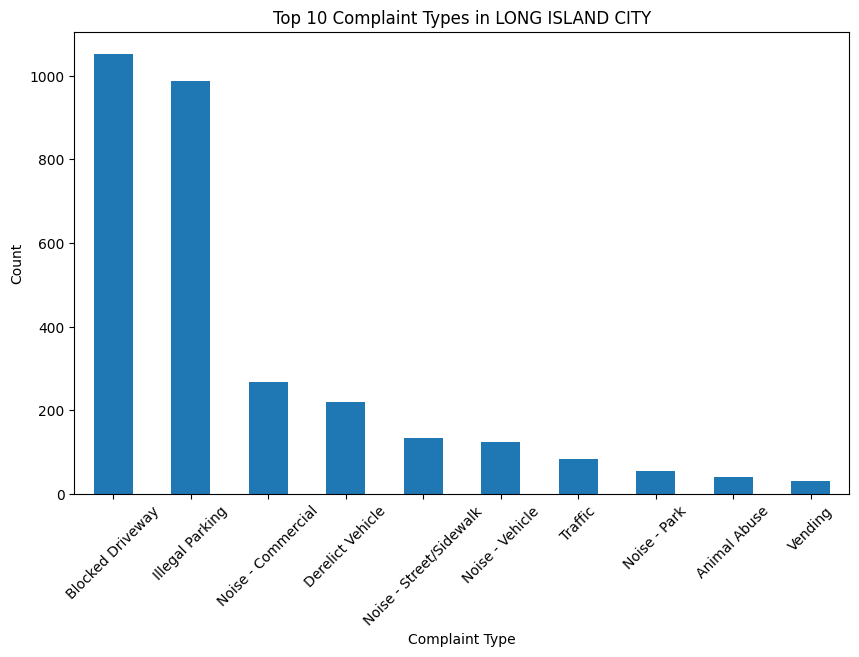

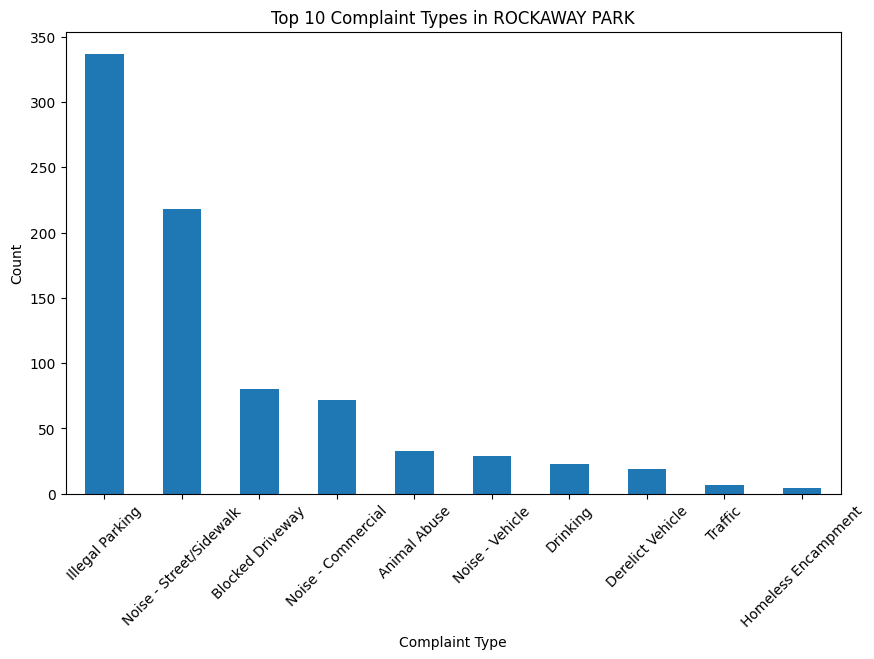

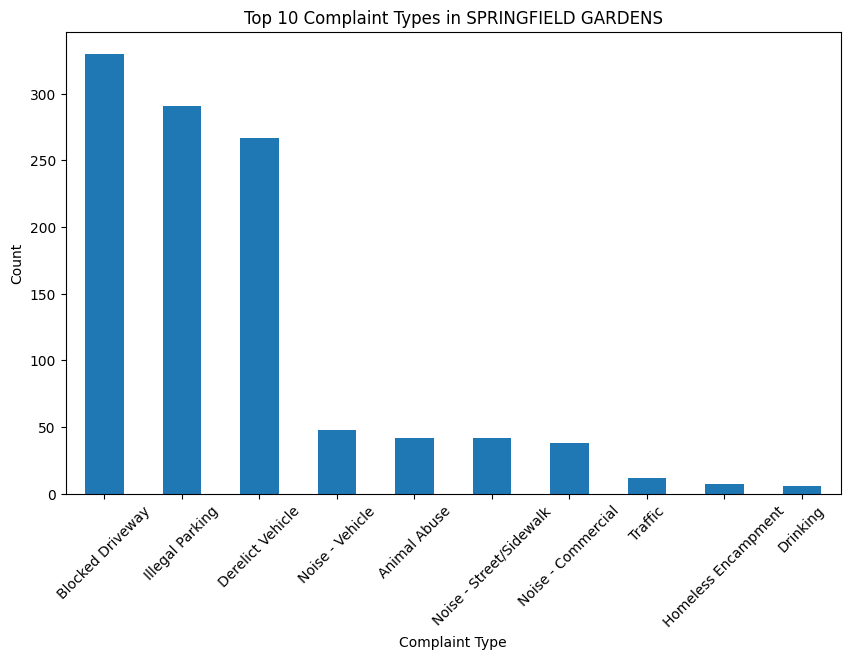

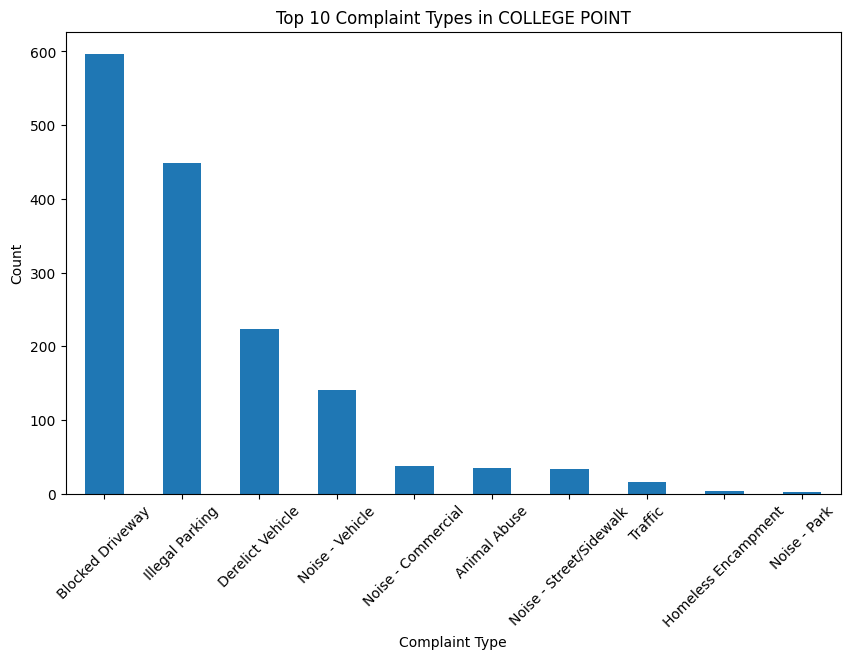

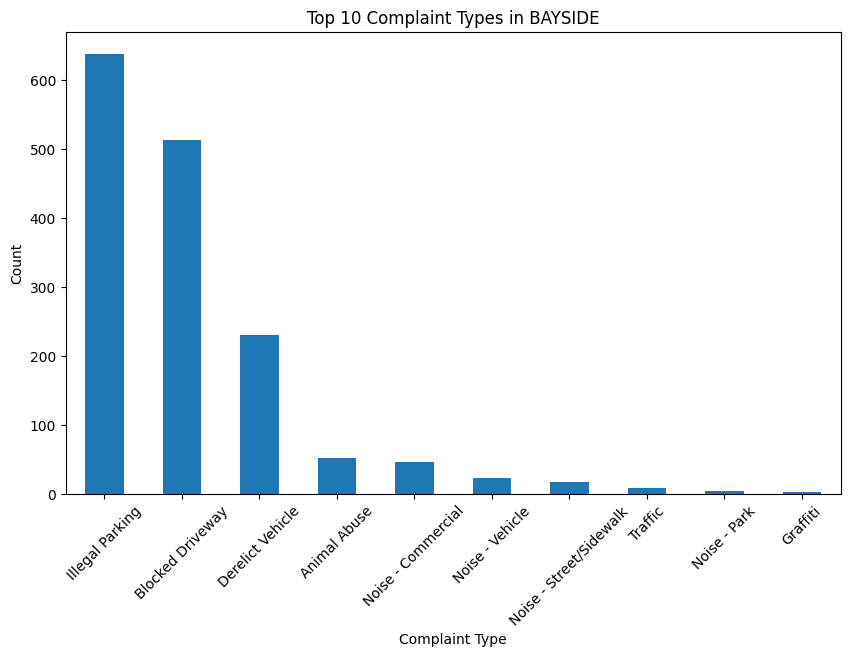

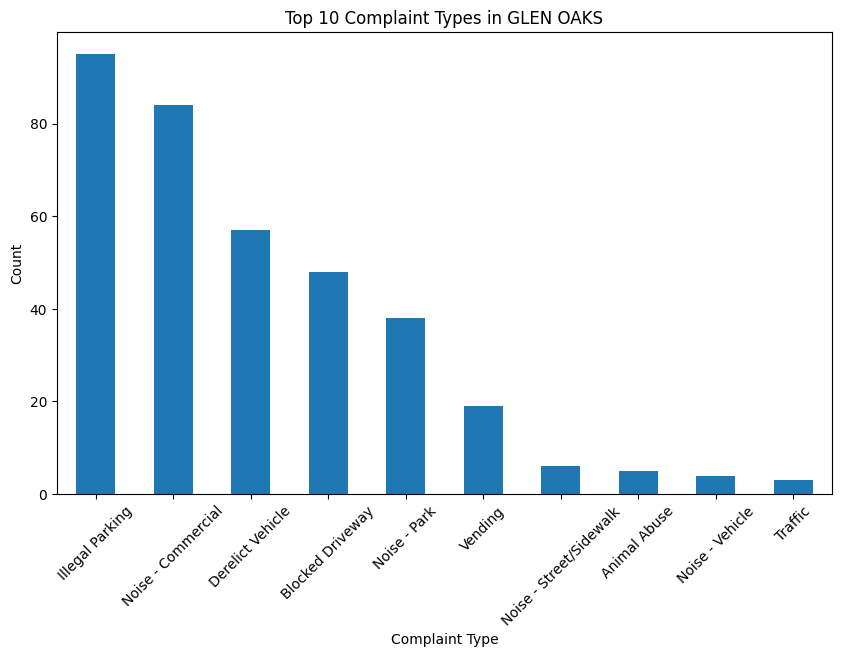

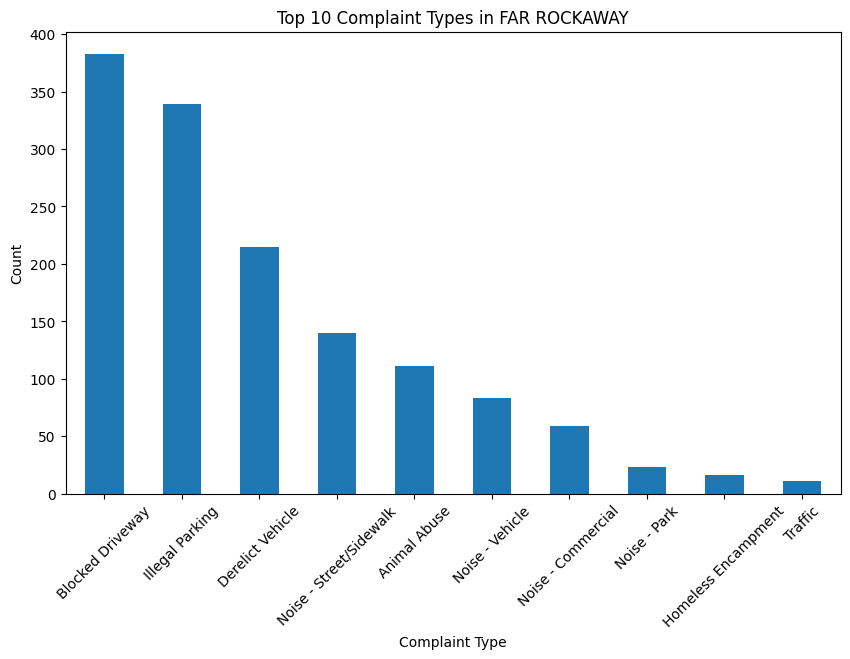

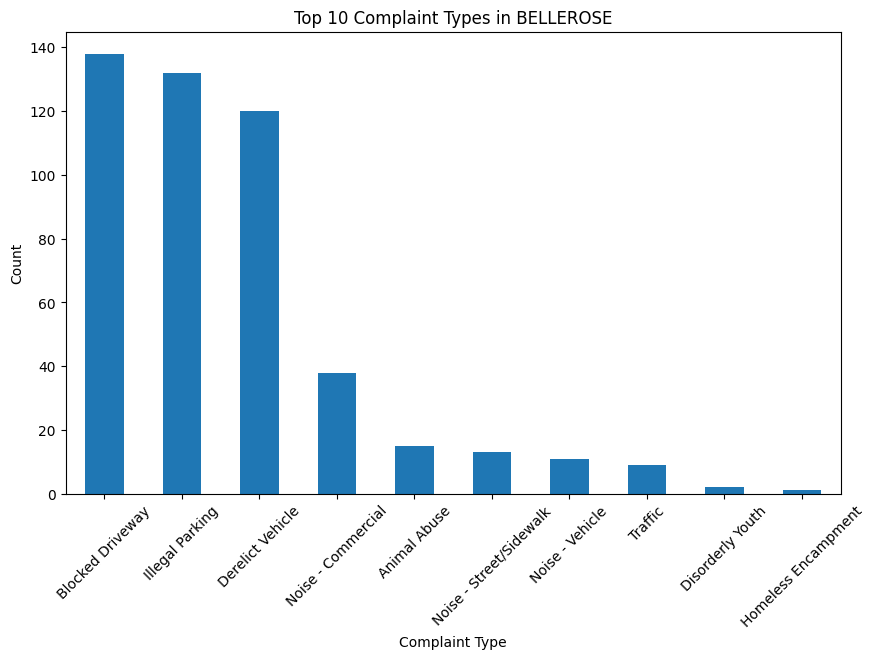

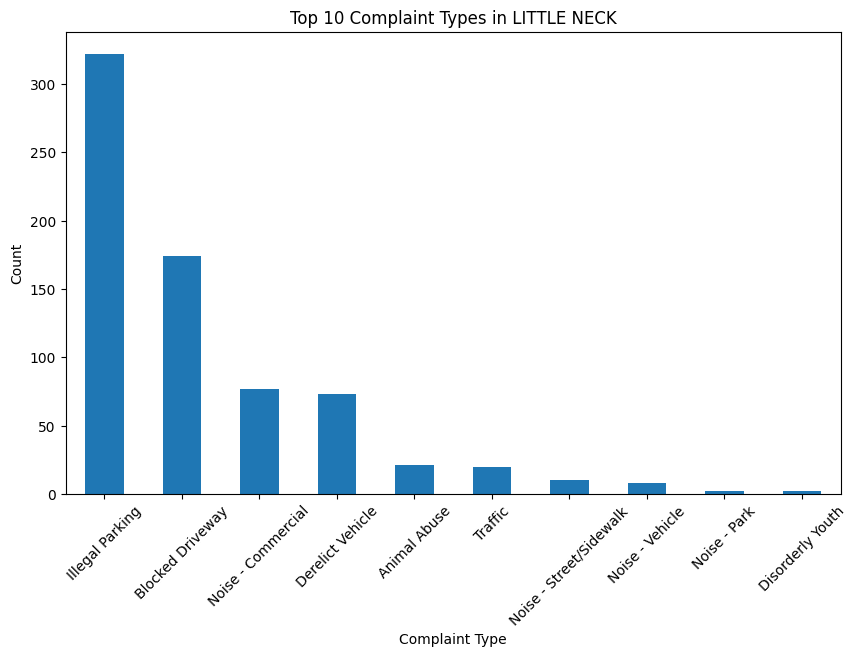

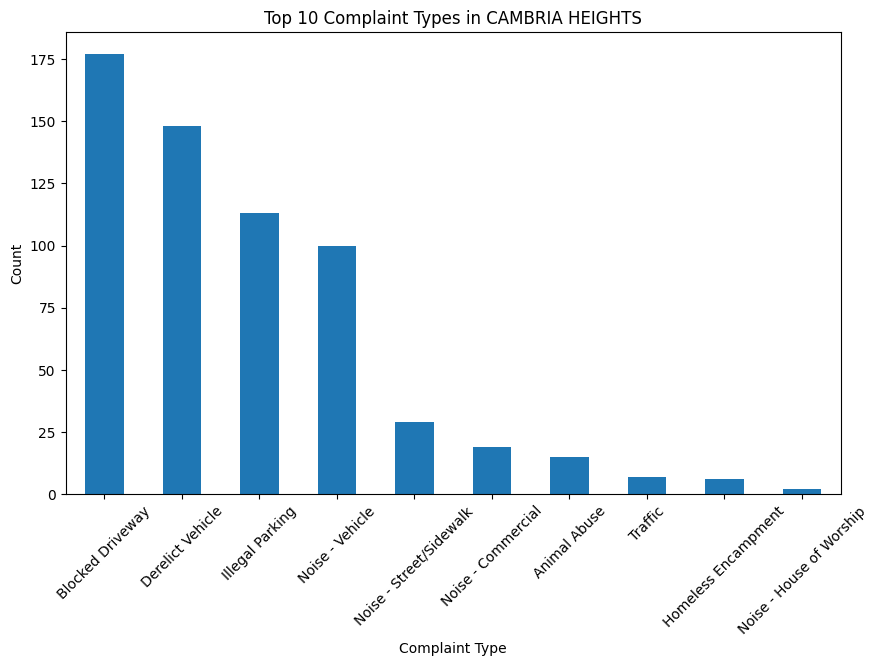

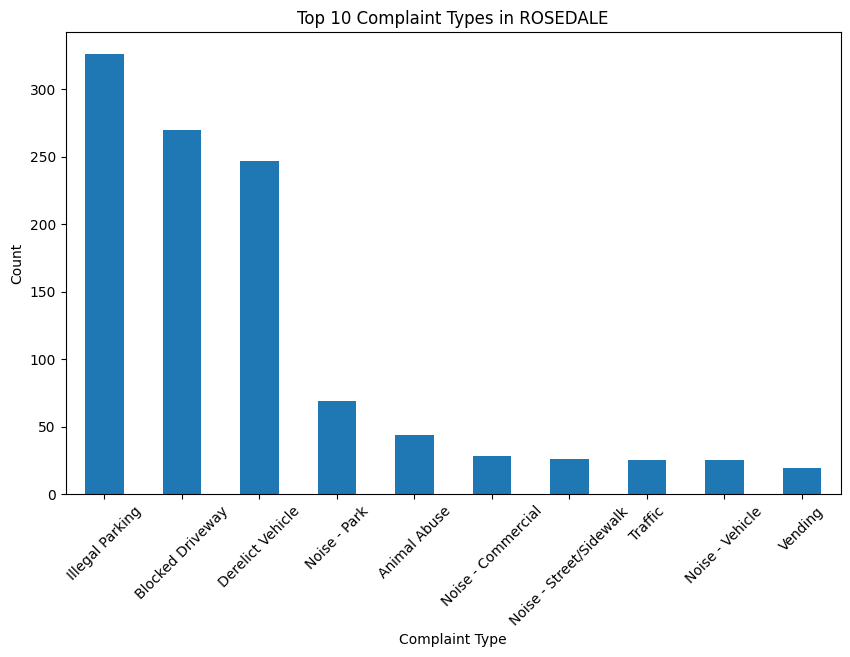

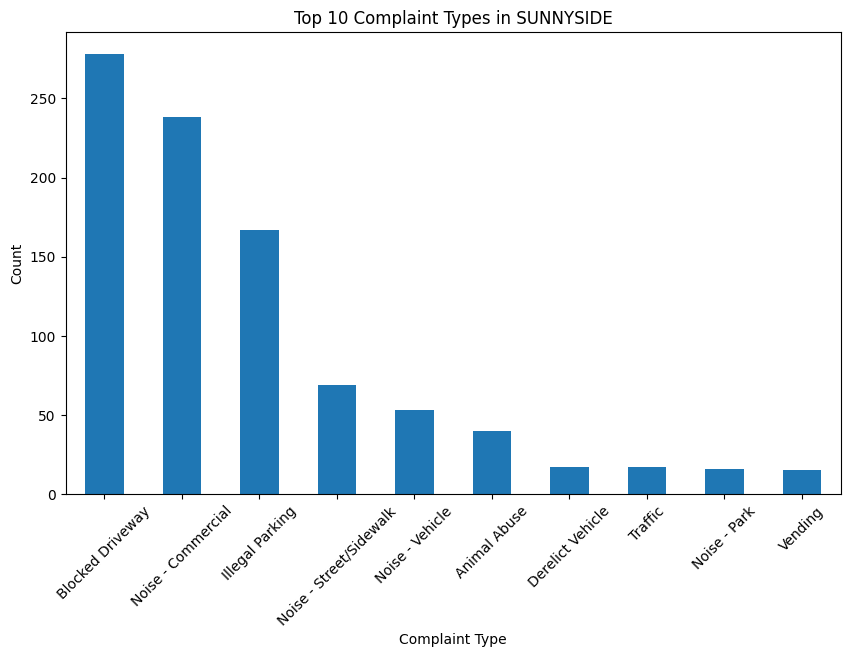

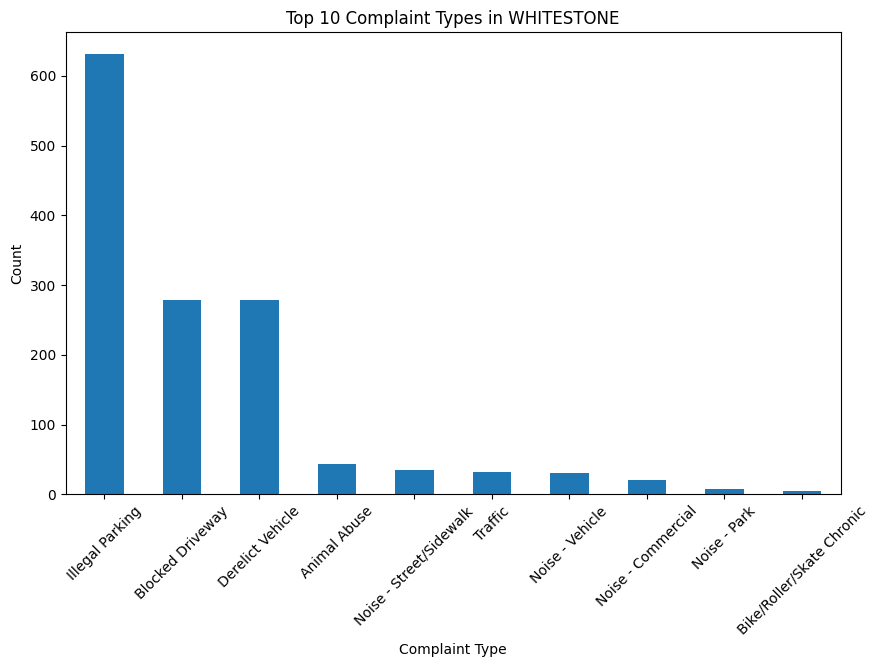

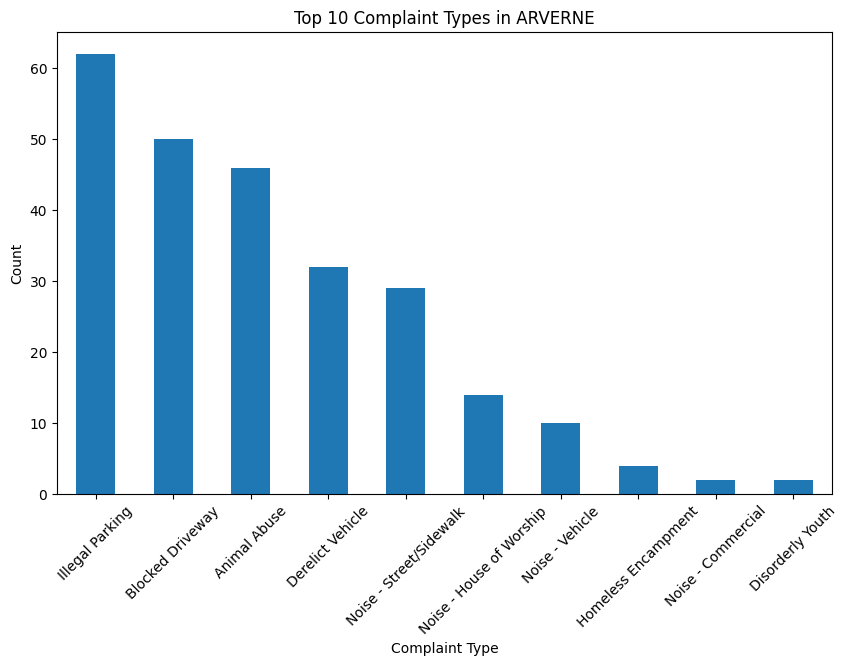

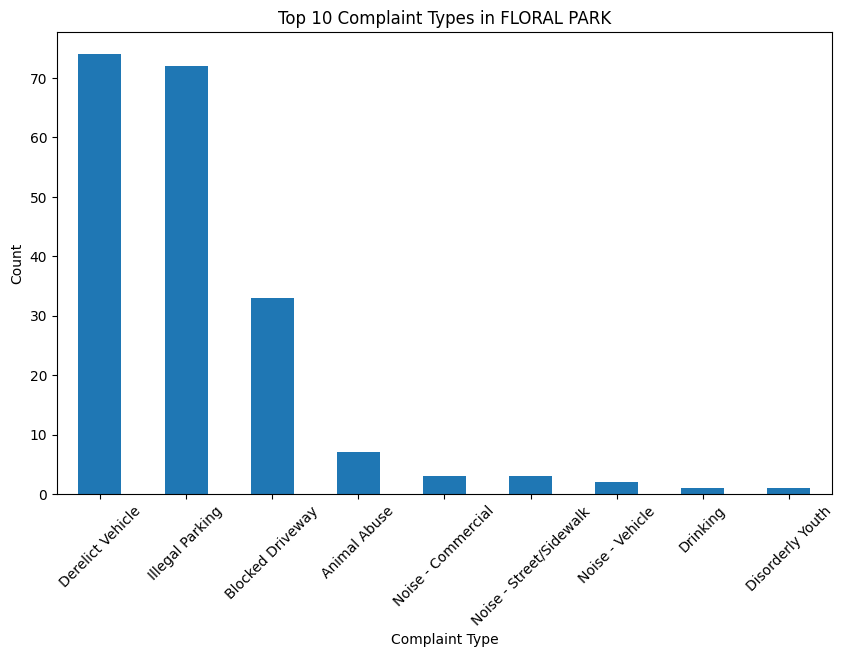

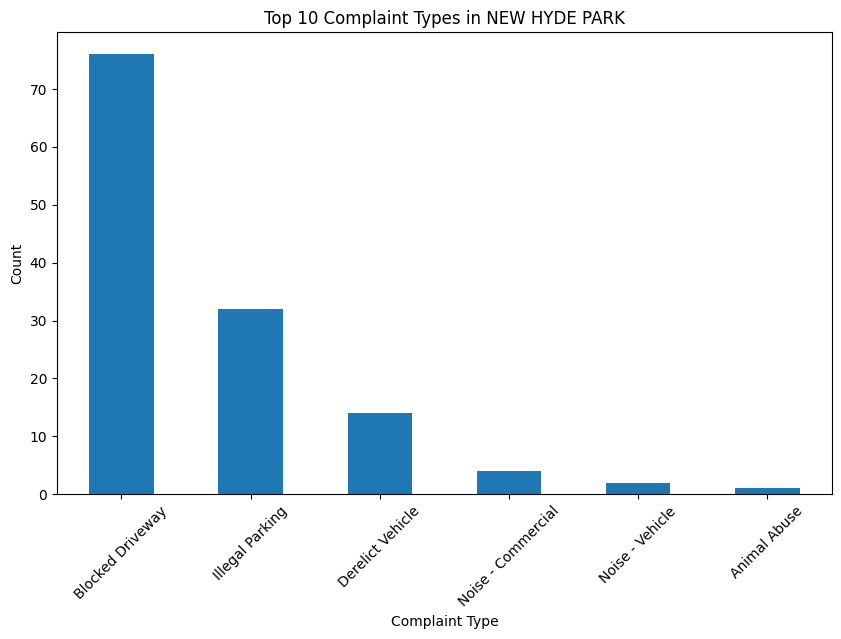

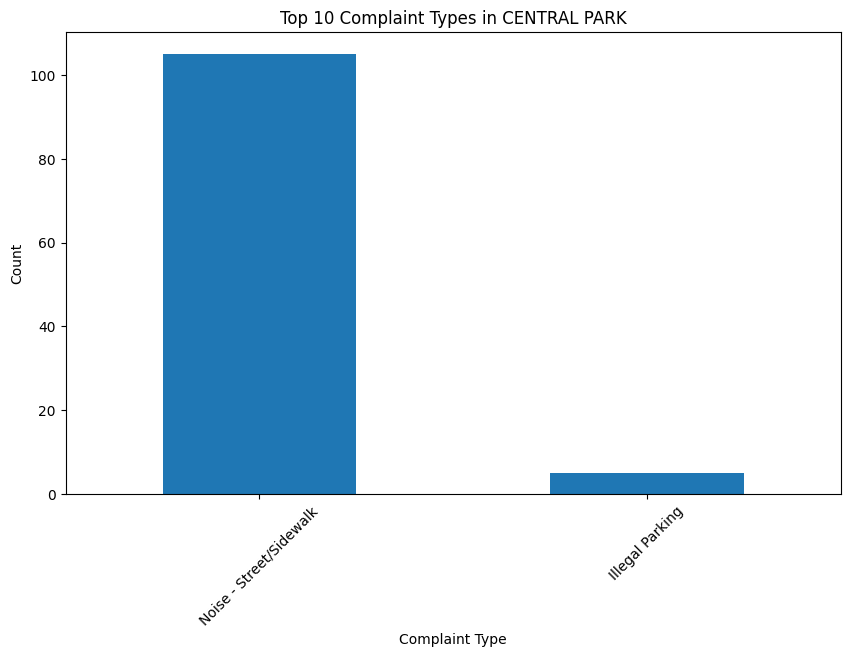

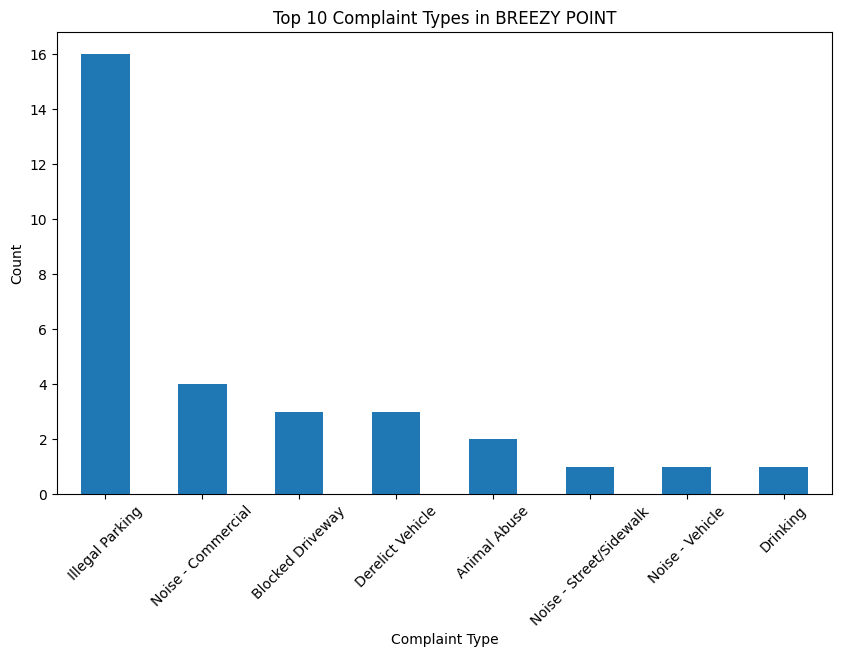

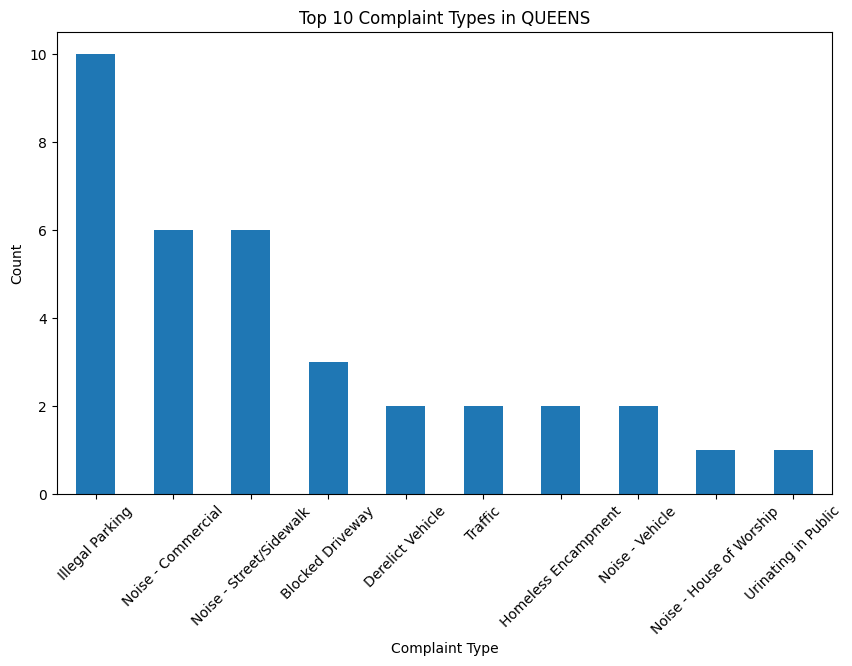

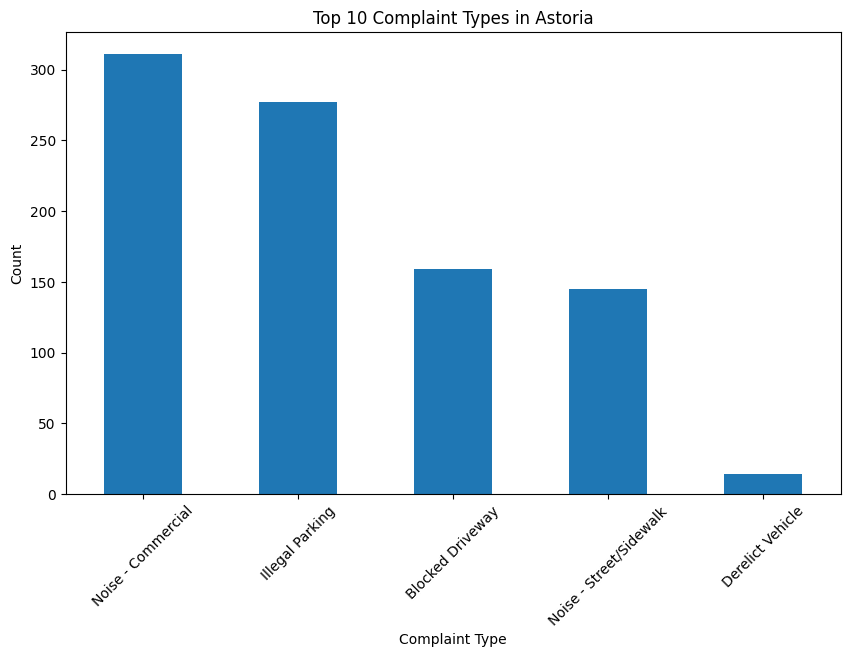

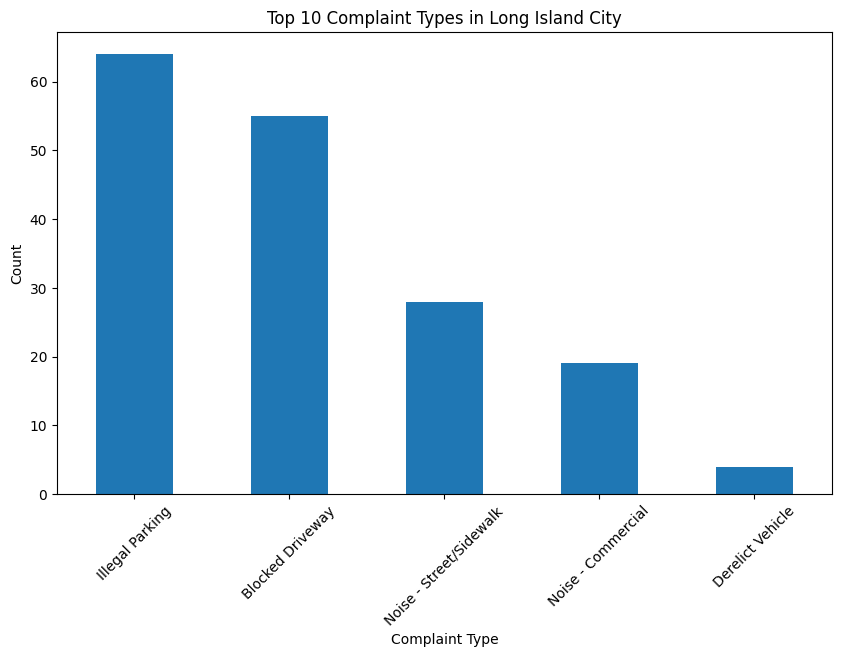

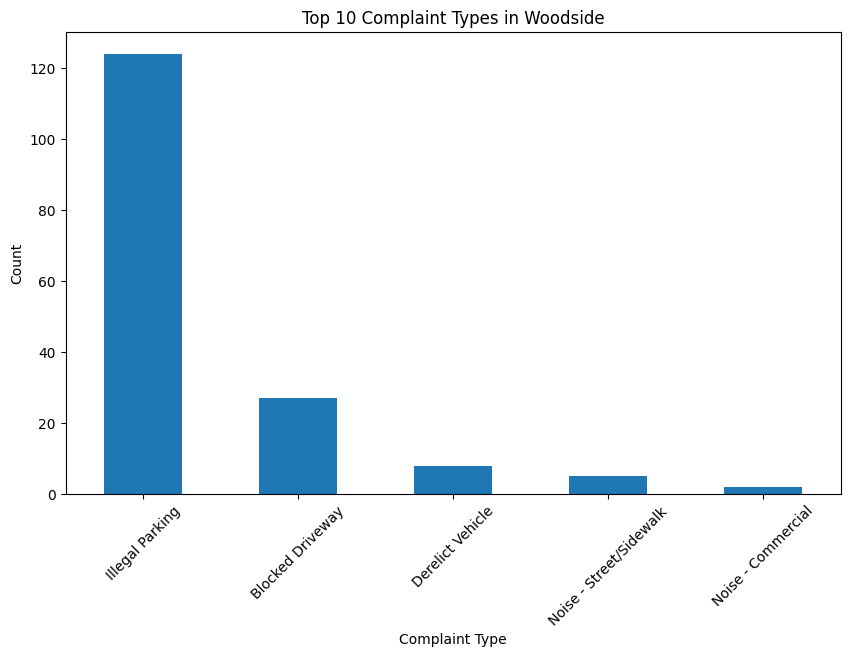

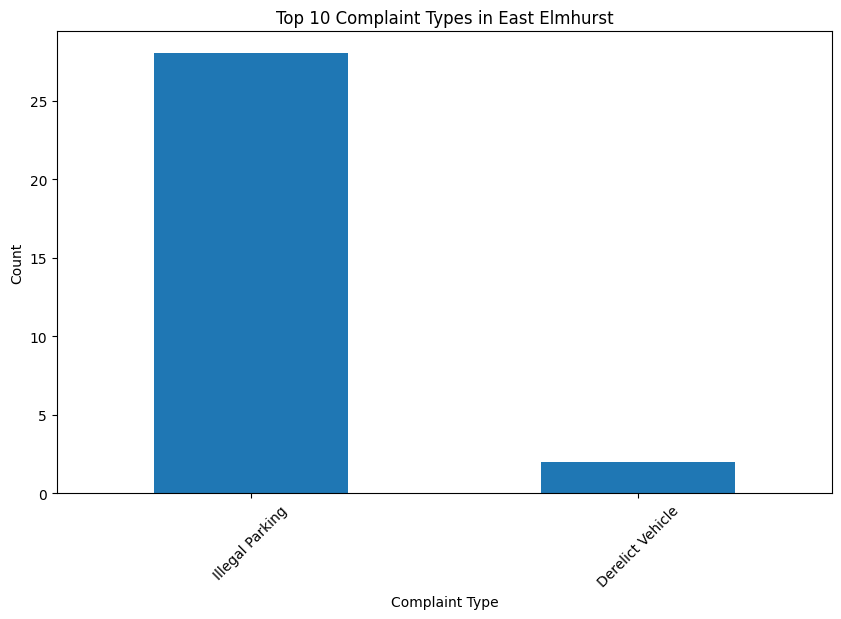

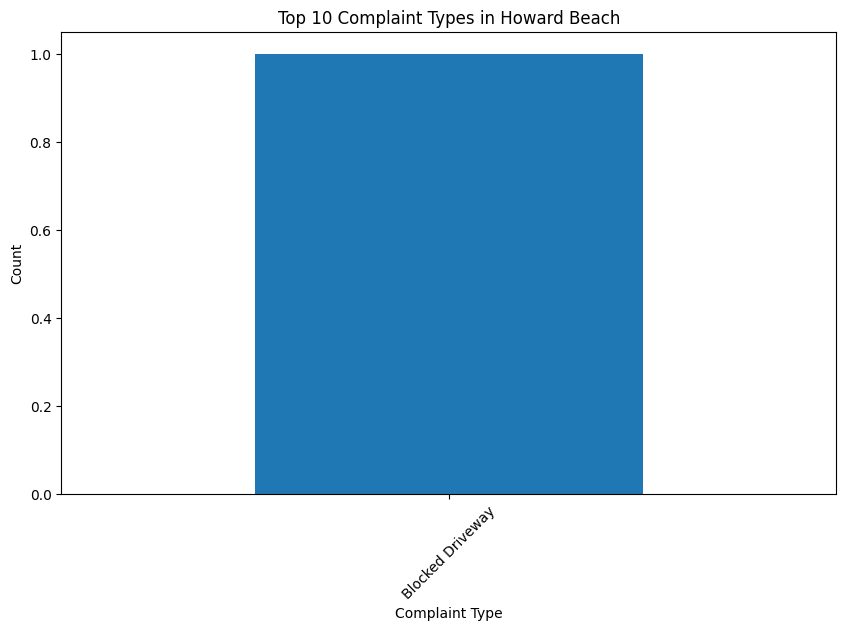

In [30]:
unique_cities = data['City'].unique()

# Create a bar plot for each city
for city in unique_cities:
    city_data = data[data['City'] == city]
    if not city_data.empty:  # Check if the DataFrame is not empty
        complaint_type_counts = city_data['Complaint Type'].value_counts()

        plt.figure(figsize=(10, 6))
        complaint_type_counts[:10].plot(kind='bar')
        plt.title(f'Top 10 Complaint Types in {city}')
        plt.xlabel('Complaint Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No complaints found for {city}.")

## Average response time across various types of complaints

In [32]:
# Convert the 'Created Date' and 'Closed Date' columns to datetime
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')


# Calculate the response time for each complaint
data['Response Time'] = data['Closed Date'] - data['Created Date']

# Group the data by 'Complaint Type' and calculate the average response time for each type
average_response_time = data.groupby('Complaint Type')['Response Time'].mean()

# Display the result
print(average_response_time)


Complaint Type
Agency Issues                  0 days 05:04:49.125000
Animal Abuse                0 days 05:00:32.556030389
Animal in a Park                     14 days 00:50:34
Bike/Roller/Skate Chronic   0 days 03:38:43.688421052
Blocked Driveway            0 days 04:30:32.521515741
Derelict Vehicle            0 days 07:02:39.600102239
Disorderly Youth            0 days 03:26:03.749206349
Drinking                    0 days 03:50:21.300569800
Ferry Complaint                                   NaT
Graffiti                    0 days 06:27:56.343949044
Homeless Encampment         0 days 04:17:31.384505021
Illegal Fireworks           0 days 02:48:33.482558139
Illegal Parking             0 days 04:20:50.435670984
Noise - Commercial          0 days 03:04:45.760531187
Noise - House of Worship    0 days 03:09:51.087078651
Noise - Park                0 days 03:23:46.055514795
Noise - Street/Sidewalk     0 days 03:23:51.295410547
Noise - Vehicle             0 days 03:29:21.800010362
Panhandling  

## Identification of significant variables by performing a statistical analysis using p-values and chi-square values

In [36]:
# Example: Assuming you have a dataset 'data' with 'Variable1' and 'Variable2'
contingency_table = pd.crosstab(data['Complaint Type'], data['Location Type'])

chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

# Check the p-value
if p < 0.05:
    print("There is a significant association between Variable1 and Variable2.")
else:
    print("There is no significant association between Variable1 and Variable2.")

There is a significant association between Variable1 and Variable2.
